## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report

## Part (a): Generating Data Points with Class Label *y = 1*



In [ ]:
num_samples = 100

# Polar coordinates
radius_vals = np.random.uniform(low = 0.0, high = 1.0, size = (num_samples))
angle_vals = np.random.uniform(low = 0.0, high = 2*np.pi, size = (num_samples))

# Cartesian coordinates dataset
X_0 = radius_vals * np.cos(angle_vals)
X_0 = np.stack((X_0, radius_vals * np.sin(angle_vals)), axis = 1)

## Plotting these points

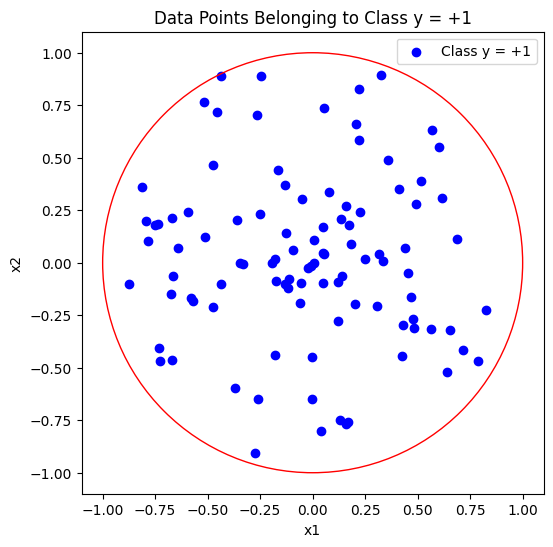

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(X_0[:, 0], X_0[:, 1], color='blue', label = 'Class y = +1')

circle = plt.Circle((0, 0), 1, color='r', fill=False)
ax.add_patch(circle)

ax.set_aspect('equal')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Data Points Belonging to Class y = +1')
ax.legend()

plt.show()

## Part (b): Generating Data Points with Class Label *y = -1*

In [ ]:
# Polar coordinates
new_radius_vals = np.random.uniform(low = 2.0, high = np.sqrt(6), size = (num_samples))

# Cartesian coordinates
X_1 = new_radius_vals * np.cos(angle_vals)
X_1 = np.stack((X_1, new_radius_vals * np.sin(angle_vals)), axis = 1)

## Plotting these points

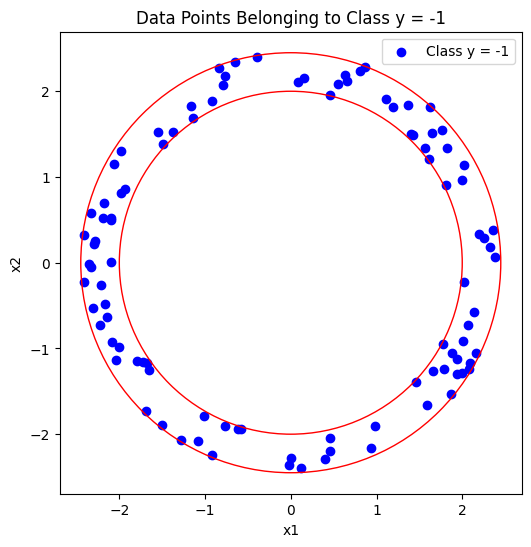

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))

ax.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', label = 'Class y = -1')

circle_1 = plt.Circle((0, 0), 2, color='r', fill=False)
circle_2 = plt.Circle((0, 0), np.sqrt(6), color='r', fill=False)

ax.add_patch(circle_1)
ax.add_patch(circle_2)

ax.set_aspect('equal')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Data Points Belonging to Class y = -1')
ax.legend()

plt.show()

## Plotting all points together

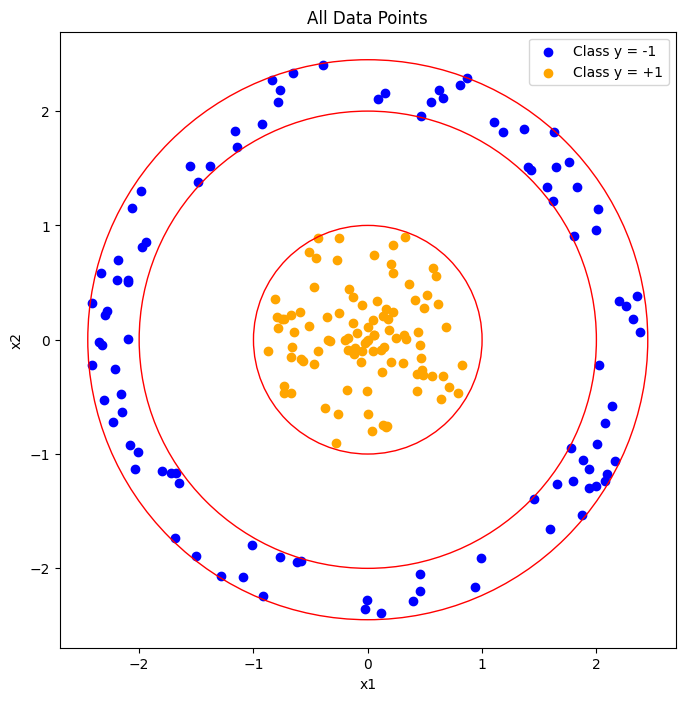

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', label = 'Class y = -1')
ax.scatter(X_0[:, 0], X_0[:, 1], color = 'orange', label = 'Class y = +1')

circle_1 = plt.Circle((0, 0), 1, color='r', fill=False)
circle_2 = plt.Circle((0, 0), 2, color='r', fill=False)
circle_3 = plt.Circle((0, 0), np.sqrt(6), color='r', fill=False)


ax.add_patch(circle_1)
ax.add_patch(circle_2)
ax.add_patch(circle_3)

ax.set_aspect('equal')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('All Data Points')
ax.legend()

plt.show()

## Generating Class Labels

In [ ]:
y_0 = np.ones(num_samples)
y_1 = -1 * np.ones(num_samples)

## Forming the Full Dataset

In [ ]:
X = np.concatenate((X_0, X_1), axis = 0)
y = np.concatenate((y_0, y_1), axis = 0)

## Part (c): Linear SVM

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

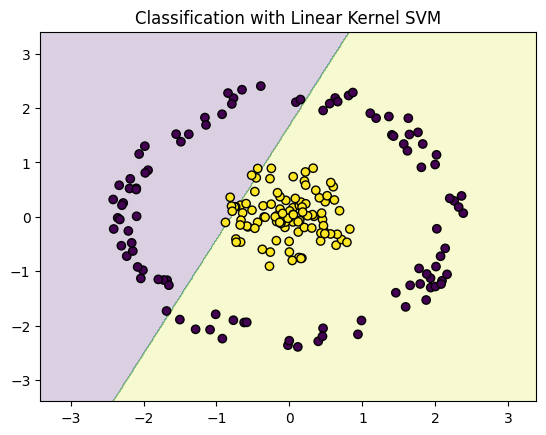

In [ ]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

# Predict over the grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.2)

# Plot original points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('Classification with Linear Kernel SVM')
plt.show()


## Linear SVM Results

In [ ]:
y_pred = clf.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

        -1.0       0.84      0.42      0.56       100
         1.0       0.61      0.92      0.74       100

    accuracy                           0.67       200
   macro avg       0.73      0.67      0.65       200
weighted avg       0.73      0.67      0.65       200



## Part (d): Implementation of Kernel SVM with RBF and Polynomial Kernels


In [ ]:
# Polynomial SVM
poly_clf = svm.SVC(kernel = 'poly')
poly_clf.fit(X, y)

# RBF SVM
rbf_clf = svm.SVC(kernel = 'rbf')
rbf_clf.fit(X, y)

SVC()

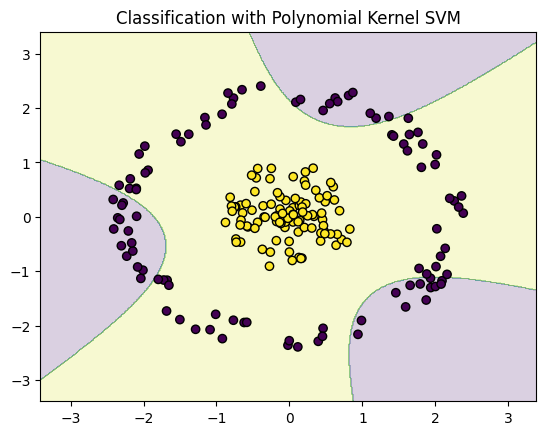

In [ ]:
# Predict over the grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = poly_clf.predict(grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.2)

# Plot original points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('Classification with Polynomial Kernel SVM')
plt.show()

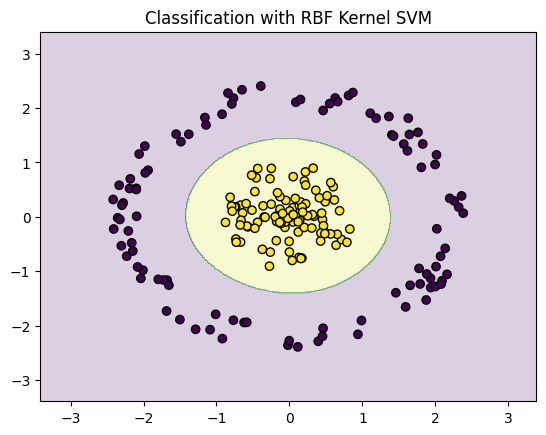

In [ ]:
# Predict over the grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = rbf_clf.predict(grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.2)

# Plot original points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('Classification with RBF Kernel SVM')
plt.show()

## Polynomial SVM Results

In [ ]:
y_pred = poly_clf.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

        -1.0       1.00      0.38      0.55       100
         1.0       0.62      1.00      0.76       100

    accuracy                           0.69       200
   macro avg       0.81      0.69      0.66       200
weighted avg       0.81      0.69      0.66       200



## RBF SVM Results

In [ ]:
y_pred = rbf_clf.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

